In [1]:
import pandas as pd


In [8]:
data = pd.read_csv('train.csv')

In [91]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,record_id
3,4200.0,36 months,13.33,142.19,C,C3,Receptionist,< 1 year,MORTGAGE,21600.0,...,19.0,w,0.0,1.0,INDIVIDUAL,0.0,165.0,28187.0,14500.0,453447199
7,14000.0,36 months,15.31,487.45,C,C2,Department of the Army,10+ years,MORTGAGE,96000.0,...,29.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,276267.0,39700.0,453322484
12,20000.0,36 months,11.99,664.20,B,B3,"Sr. Specialist, Tax",10+ years,RENT,110000.0,...,35.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,41806.0,54600.0,453423047
16,8650.0,36 months,12.12,287.80,B,B3,Haven Hospice,8 years,RENT,76000.0,...,20.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,614403.0,10000.0,453286318
17,25000.0,60 months,17.27,624.95,C,C5,Cheney Public Schools,6 years,MORTGAGE,108000.0,...,40.0,f,0.0,1.0,INDIVIDUAL,0.0,0.0,337866.0,23800.0,453277374


In [92]:
data = data.dropna()
numeric_data = data.drop(['emp_title', 'home_ownership', 'record_id', 'pymnt_plan', 'earliest_cr_line', 'emp_length', 'grade', 'sub_grade', 'application_type', 'issue_d', 'zip_code', 'policy_code', 'verification_status', 'purpose', 'initial_list_status', 'addr_state'], axis=1)
# numeric_data = numeric_data.sort_values(['emp_length'])
numeric_data['term'] = pd.factorize(numeric_data['term'])[0]
# numeric_data['emp_length'] = pd.factorize(numeric_data['emp_length'])[0]

In [93]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 20 columns):
loan_amnt                     69010 non-null float64
term                          69010 non-null int64
int_rate                      69010 non-null float64
installment                   69010 non-null float64
annual_inc                    69010 non-null float64
loan_status                   69010 non-null int64
dti                           69010 non-null float64
delinq_2yrs                   69010 non-null float64
inq_last_6mths                69010 non-null float64
mths_since_last_delinq        69010 non-null float64
open_acc                      69010 non-null float64
pub_rec                       69010 non-null float64
revol_bal                     69010 non-null float64
revol_util                    69010 non-null float64
total_acc                     69010 non-null float64
collections_12_mths_ex_med    69010 non-null float64
acc_now_delinq                69010 non-null f

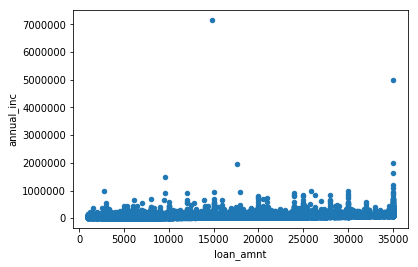

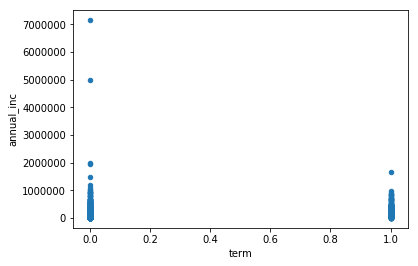

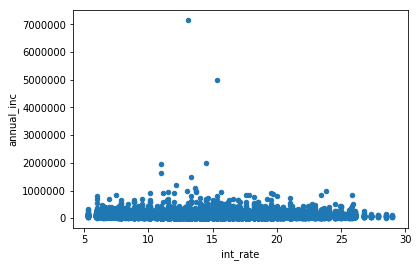

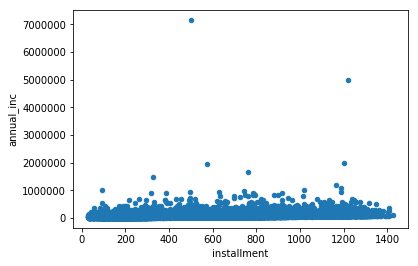

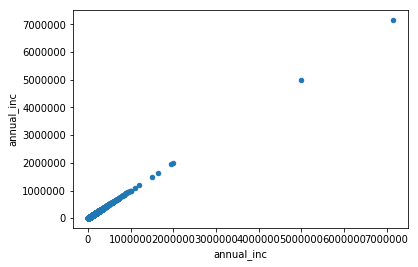

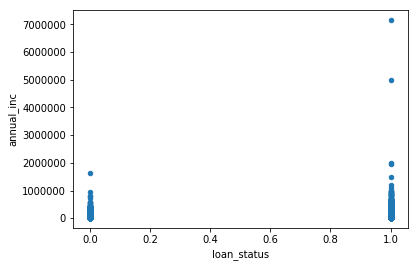

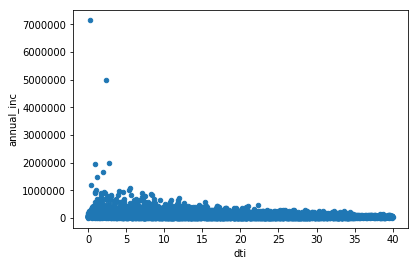

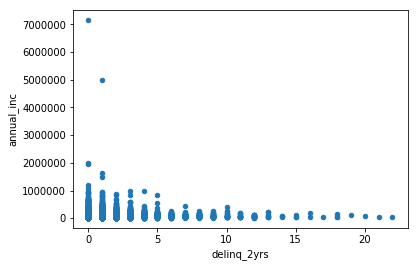

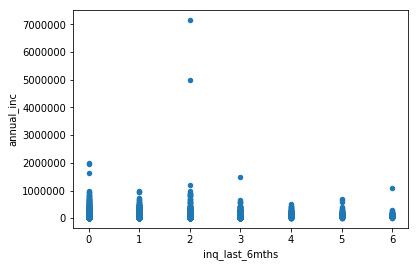

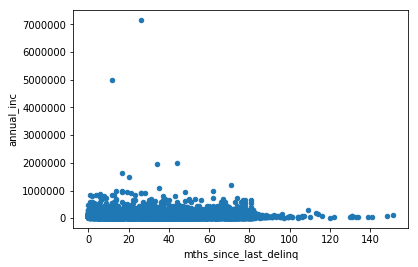

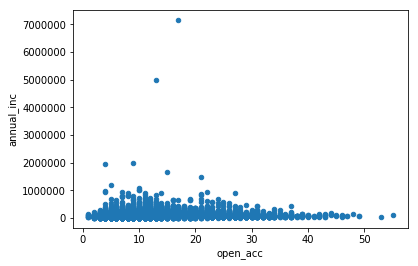

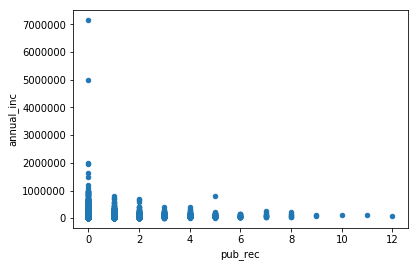

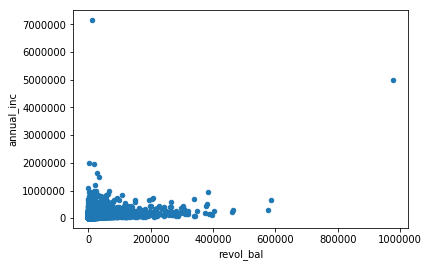

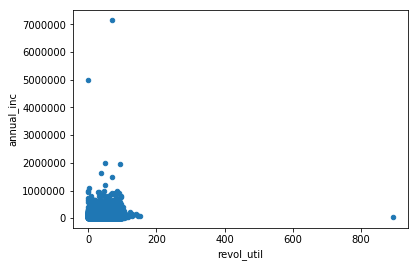

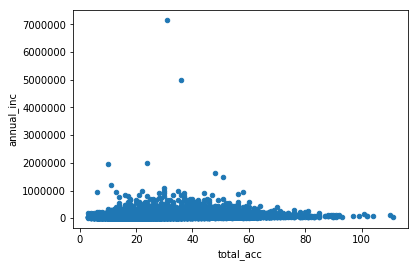

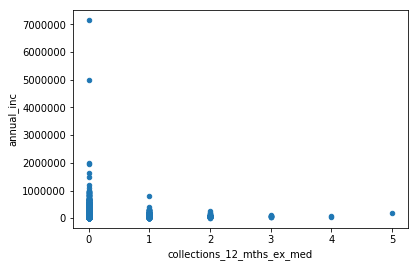

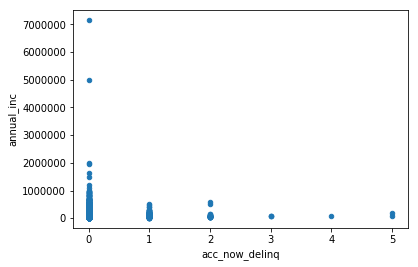

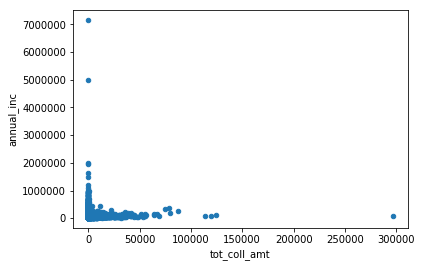

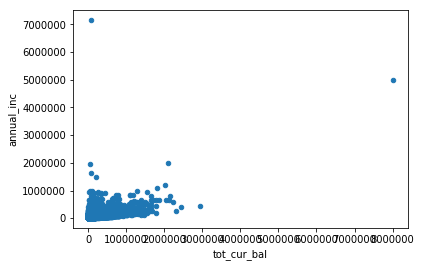

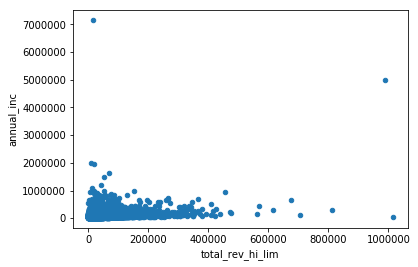

In [94]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


for idx, feature in enumerate(numeric_data.columns):
    numeric_data.plot(feature, 'annual_inc', subplots=True, kind="scatter")

In [95]:
numeric_data.corr()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1.000000,0.419079,0.207200,0.956240,0.331844,-0.088639,0.014448,0.015918,-0.002139,-0.045005,0.164705,-0.084529,0.322258,0.113615,0.179799,-0.004409,0.014012,-0.015747,0.287614,0.329247
term,0.419079,1.000000,0.476435,0.179839,0.064264,-0.163852,0.065962,0.003740,0.021812,-0.021351,0.062261,-0.017880,0.085757,0.048689,0.082595,0.009625,0.014615,-0.003611,0.102576,0.080900
int_rate,0.207200,0.476435,1.000000,0.185929,-0.042272,-0.227392,0.138871,0.048905,0.244733,-0.051393,-0.008830,0.050516,-0.005866,0.213826,-0.034667,0.024280,0.034284,-0.001015,-0.076956,-0.134928
installment,0.956240,0.179839,0.185929,1.000000,0.326908,-0.070348,0.012320,0.022244,0.022352,-0.047534,0.156608,-0.077405,0.314118,0.132536,0.162616,-0.004108,0.016051,-0.016099,0.260773,0.306071
annual_inc,0.331844,0.064264,-0.042272,0.326908,1.000000,0.051448,-0.218072,0.047132,0.058471,-0.059079,0.102731,-0.017564,0.331312,0.043398,0.159722,0.000711,0.017155,0.007769,0.462450,0.307140
loan_status,-0.088639,-0.163852,-0.227392,-0.070348,0.051448,1.000000,-0.136949,-0.041271,-0.040288,0.033311,-0.027063,-0.005599,0.005325,-0.066880,0.025307,-0.014905,-0.017302,0.004174,0.059417,0.037817
dti,0.014448,0.065962,0.138871,0.012320,-0.218072,-0.136949,1.000000,0.001057,-0.005441,0.008214,0.269412,-0.054795,0.110326,0.156861,0.195443,-0.004855,0.010475,-0.025004,-0.045734,0.057436
delinq_2yrs,0.015918,0.003740,0.048905,0.022244,0.047132,-0.041271,0.001057,1.000000,0.010379,-0.572795,0.053278,-0.044972,-0.008609,-0.019327,0.090099,0.040895,0.104517,-0.021791,0.063681,-0.005312
inq_last_6mths,-0.002139,0.021812,0.244733,0.022352,0.058471,-0.040288,-0.005441,0.010379,1.000000,0.012680,0.117040,0.054304,-0.015696,-0.091848,0.141998,0.001743,-0.006955,0.010750,0.043393,0.016165
mths_since_last_delinq,-0.045005,-0.021351,-0.051393,-0.047534,-0.059079,0.033311,0.008214,-0.572795,0.012680,1.000000,-0.038754,0.103803,-0.025355,0.018126,-0.059135,-0.039365,-0.134521,0.024644,-0.089239,-0.038240


* Общий баланс кредита коррелирует с кредитным лимитом.
* Ежемесячный взнос коррелирует с суммой кредита.

In [96]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression


df_shuffled = shuffle(numeric_data, random_state=123)
X = scale(df_shuffled.drop(['annual_inc'], axis=1))
y = df_shuffled['annual_inc']

/home/anna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


In [97]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
list(zip(numeric_data.drop(['annual_inc'], axis=1), linear_regressor.coef_))

[('loan_amnt', 12169.209024766993),
 ('term', -2923.8740412988336),
 ('int_rate', -1041.1329629498612),
 ('installment', 401.7013869408215),
 ('loan_status', 553.7933011640572),
 ('dti', -13504.412779734928),
 ('delinq_2yrs', 1045.067101819699),
 ('inq_last_6mths', 2561.7393680778255),
 ('mths_since_last_delinq', -434.5256036103716),
 ('open_acc', -332.0431517683791),
 ('pub_rec', 1559.0350448133138),
 ('revol_bal', 10367.61192904928),
 ('revol_util', 57.93718611709783),
 ('total_acc', 3683.395434349142),
 ('collections_12_mths_ex_med', 104.87801517185014),
 ('acc_now_delinq', 319.32025716373806),
 ('tot_coll_amt', 364.5374789365139),
 ('tot_cur_bal', 18716.820862413893),
 ('total_rev_hi_lim', -1071.990349741549)]

In [98]:
from sklearn.linear_model import Lasso


alphas = np.arange(1, 200, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) 

for row_index, row in enumerate(coefs_lasso):
    regressor = Lasso(alphas[row_index])
    regressor.fit(X, y)
    for i, _ in enumerate(row):
        row[i] = regressor.coef_[i]
print(coefs_lasso[1])

[ 11153.27364435  -2611.95333389  -1026.06547631   1249.42666314
    517.75313489 -13467.1330469    1023.0217769    2478.81341199
   -392.6532836    -256.08344779   1509.50264812   9954.84416611
    113.86064056   3567.51044212     56.52584472    262.00497148
    321.04095232  18730.42583122   -624.26301008]


Text(0.5, 1.0, 'Lasso')

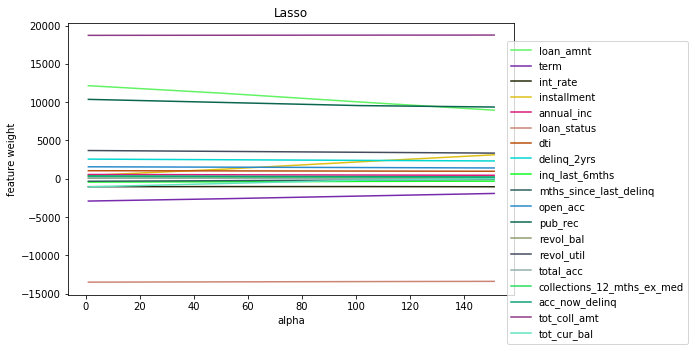

In [99]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, numeric_data.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")